# Data Information 

In [135]:
from __future__ import print_function, division
import pydicom
import torch
import torchvision
import os
import sys
import pandas as pd
import numpy as np
import pydicom as DCM
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from CDDSM import *

In [136]:
train_df = createTrainFrame('/home/himanshu')

In [137]:
img_df = train_df['image file path']
mask_df = train_df['cropped image file path']
cropped_img_df = train_df['ROI mask file path']

In [164]:

homedir='/home/himanshu/'
cropped_img_df=cropped_img_df.str.replace('\n','')
    

P_00009
CuratedDDSM/Train/Mass/CBIS-DDSM/Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.348094436212980762312744999743818171955/1.3.6.1.4.1.9590.100.1.2.392091931911637760938815694332198115839/000000.dcm
CuratedDDSM/Train/MassROI/CBIS-DDSM/Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.242248988911264591618859462853814566714/1.3.6.1.4.1.9590.100.1.2.38355348211600094806469224183939342192/000000.dcm
CuratedDDSM/Train/MassROI/CBIS-DDSM/Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.242248988911264591618859462853814566714/1.3.6.1.4.1.9590.100.1.2.38355348211600094806469224183939342192/000001.dcm


In [190]:
to_tensor = transforms.ToTensor()

def dcm2img(dcmfile):
    img_2d =  dcmfile.pixel_array.astype(float)
    img_2d_scaled = (np.maximum(img_2d,0)/img_2d.max()) * 255.0
    img_2d_scaled = np.uint8(img_2d_scaled)
    img =  Image.fromarray(img_2d_scaled)
    imgTensor = to_tensor(img)
    return imgTensor,img

def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)),cmap='jet')
    

In [191]:
idx=2
img=DCM.dcmread(homedir+img_df[idx])
mask=DCM.dcmread(homedir+mask_df[idx])
cropped=DCM.dcmread(homedir+cropped_img_df[idx])
print(train_df['patient_id'][idx])
print(img_df[idx])
print(mask_df[idx])
print(cropped_img_df[idx])
imgTensor,IMG=dcm2img(img)
maskTensor,MASK =dcm2img(mask)
croppedTensor,CROP =dcm2img(cropped)
print('Image : ',imgTensor.shape)
print('Mask : ',maskTensor.shape)
print('Cropped : ' ,croppedTensor.shape)

P_00004
CuratedDDSM/Train/Mass/CBIS-DDSM/Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.347107867812656628709864319310977895697/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/000000.dcm
CuratedDDSM/Train/MassROI/CBIS-DDSM/Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000000.dcm
CuratedDDSM/Train/MassROI/CBIS-DDSM/Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.414182170112396175925115449620455230167/1.3.6.1.4.1.9590.100.1.2.429120414011832984817094399141838850375/000001.dcm
Image :  torch.Size([1, 5491, 2986])
Mask :  torch.Size([1, 5491, 2986])
Cropped :  torch.Size([1, 466, 423])


In [192]:
if(maskTensor.shape==imgTensor.shape):
    mask=maskTensor
    crop=croppedTensor
else:
    mask=croppedTensor
    crop=maskTensor


In [193]:
grid = torchvision.utils.make_grid([imgTensor,mask])
grid.shape

torch.Size([3, 5495, 5978])

TypeError: from_bounds() argument after * must be an iterable, not int

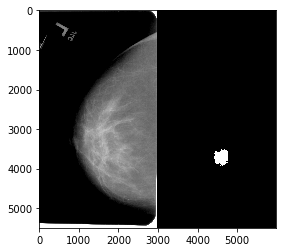

In [200]:
imshow(grid)

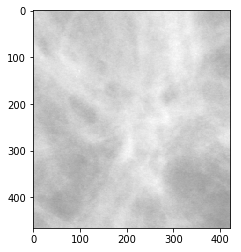

In [196]:
imshow(torchvision.utils.make_grid(crop))